#Causal Assumptions
Authors: Megha Patel
![image](https://github.com/meghamkpatel/INFO_7390_Art_and_Science_of_Data/assets/32498703/a129f0ad-2653-42ab-a5fd-e2c26d23b518)

##Abstract

This notebook explores the fundamental concept of causality and its application in data science, emphasizing the challenges of establishing causal relationships between variables. Causal inference is essential for making informed decisions and predictions based on data, as it involves understanding the direct impact of one or more variables on another. The discussion delves into the complexity of inferring causality from data, particularly highlighting the limitations of relying solely on correlation, which does not guarantee causation due to potential confounding factors. To conduct accurate causal analysis, researchers must adhere to critical assumptions, including ignorability, consistency, and the Stable Unit Treatment Value Assumption (SUTVA). This notebook elucidates these assumptions, underscores their significance, and provides practical code implementations for enhanced comprehension.

##Table of Contents
1. [Abstract](https://)
2. [Introduction](#scrollTo=4R9sz0yAl8cO)
3. [SUTVA](#scrollTo=AdNmw1rVUA3l)
4. [Consistency](#scrollTo=bTGTqkBWEYTk)
5. [Ignorability](#scrollTo=ToaAXqkgETXQ)
6. [Positivity](#scrollTo=PNIv5PHhEgqM)
7. [Conclusion](#scrollTo=_rRu313UEpAG)
8. [References](https://)
9. [License](https://)

#Introduction

Causality refers to the relationship between cause and effect when analyzing the impact of one or more variables on another. Understanding causality is crucial for making informed decisions and predictions based on data.

Causal relationships imply that a change in one variable directly causes a change in another. However, establishing causality is challenging because correlation (association between variables) does not necessarily imply causation because there could be confounding factors or other explanations.

To infer causality from data, researchers often use experimental designs, such as randomized controlled trials (RCTs), where participants are randomly assigned to different groups. Randomization helps control for confounding factors and increases the likelihood that observed differences are due to the manipulated variable. However, experimental designs cannot be used for all situations, and in such cases, researchers must use statistical methods and causal inference techniques to strengthen their arguments about causation.

To perform accurate causal analysis, it is crucial to understand and adhere to certain assumptions, including ignorability, consistency, and the Stable Unit Treatment Value Assumption (SUTVA). This notebook will discuss these assumptions, their significance, and provide practical code implementations for better comprehension.

For the purposes of this notebook, we will use a medical cost dataset to provide examples of these assumptions. This dataset is used to predict insurance costs based on a person's age, gender, health, and other factors.

Reference: https://www.kaggle.com/datasets/mirichoi0218/insurance/code
![image](https://github.com/meghamkpatel/INFO_7390_Art_and_Science_of_Data/assets/32498703/35b13438-3191-4049-ab8f-c291736cd017)


###The Data
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: number of children covered by health insurance / Number of dependents

* smoker: whether the beneficiary smokes or not

* region: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.

* charges: individual medical costs billed by health insurance


First, let's download our dataset and check for any missing data.

In [ ]:
!git clone https://github.com/meghamkpatel/INFO_7390_Art_and_Science_of_Data.git

Cloning into 'INFO_7390_Art_and_Science_of_Data'...
remote: Enumerating objects: 1169, done.
remote: Counting objects: 100% (1169/1169), done.
remote: Compressing objects: 100% (658/658), done.
remote: Total 1169 (delta 638), reused 971 (delta 497), pack-reused 0
Receiving objects: 100% (1169/1169), 193.96 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (638/638), done.
Updating files: 100% (214/214), done.


In [ ]:
import pandas as pd
import statsmodels.api as sm
data = pd.read_csv("/content/INFO_7390_Art_and_Science_of_Data/Causal_Inference/insurance.csv")

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We see that there are no missing data values and the ranges for each value make sense.

#SUTVA - Stable Unit Treatment Value Assumption

SUTVA assumes that the treatment assignment to one unit does not affect the potential outcomes of other units, and there is no interference or spillover of treatment effects between units.

Unit in SUTVA refers to the individual entities or observational units within a study. These units could be individuals, households, organizations, or any entities under observation. Treatment value represents the specific level or condition of the treatment variable applied to a unit. For example, in a randomized experiment, a unit is either assigned to the treatment group or the control group, and the treatment value indicates the specific treatment that a unit receives.

In practice, checking SUTVA involves assessing whether the treatment effect in one group is consistent across different levels of treatment assigned to other units.

![image](https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/assets/32498703/397b7a64-e1e1-4017-8d47-c7a280929395)





###Attributes of SUTVA
* No Interference Between Units: SUTVA assumes that there is no interference or spillover effect between units. The treatment status of one unit does not affect the outcomes of other units.

* Consistency of Treatment Effects: SUTVA ensures that the treatment effect is consistent across all units, regardless of the specific treatment values assigned to other units. Each unit's potential outcome is determined solely by its own treatment condition.

* One Version of Treatment: SUTVA assumes that there is only one version or level of the treatment variable. In other words, there are no variations in how the treatment is administered, and all units assigned to the treatment group receive the same treatment.

###Example
To demonstrate SUTVA using the Medical Cost Personal Datasets, we'll focus on the scenario where the treatment is binary (e.g., whether a person is a smoker or not) and the outcome is continuous (e.g., medical charges). We'll check for SUTVA by examining the consistency of the treatment effect within the treated group. Note that this is a simplified example, and in a real-world scenario, you might have a more demanding treatment assignment.

In [ ]:
# Assuming 'smoker' is the binary treatment variable and 'charges' is the continuous outcome variable
treatment_group = data[data['smoker'] == 'yes']['charges']
control_group = data[data['smoker'] == 'no']['charges']

# Check for SUTVA by comparing the treatment effect in each group
treatment_effect_treated = treatment_group.mean()
treatment_effect_control = control_group.mean()

print(f"Treatment Effect in Smoker Group: {treatment_effect_treated}")
print(f"Treatment Effect in Non-Smoker Group: {treatment_effect_control}")


Treatment Effect in Smoker Group: 32050.23183153284
Treatment Effect in Non-Smoker Group: 8434.268297856204


In this example, we're checking if there's consistency in the treatment effect by comparing the average medical charges in the 'smoker' and 'non-smoker' groups. If SUTVA holds, the treatment effect (difference in charges) in the smoker group should not be influenced by the treatment assignment in the non-smoker group, and vice versa.

From the results, we see that the treatment effects for smokers and non-smokers end with different mean insurance chargers. Thus, this suggests that being a smoker has an impact on medical charges within the 'smoker' group.

###Challenges and Considerations
In real-world scenarios, achieving strict adherence to SUTVA can be challenging. Factors such as spillover effects, non-compliance, and variations in treatment administration may violate the assumption. Researchers need to carefully consider these factors and, when possible, design studies and analyses that account for potential violations of SUTVA.

Understanding and acknowledging the assumptions is critical for making valid causal inferences and interpreting the results of experimental or observational studies. Violations of SUTVA can lead to biased estimates of treatment effects and compromise the internal validity of a study. Therefore, researchers must carefully assess and address the assumptions underlying their causal inference methods.

#Consistency

Consistency in causal inference implies  the stability and reliability of treatment effects across different conditions and populations. In simple terms, consistency ensures that the estimated impact of a treatment is reliable and does not fluctuate when analyzed across different groups or conditions. It emphasizes the uniformity of treatment effects within the studied population. This section will elaborate on the theoretical foundations of consistency, its significance in causal inference, and provide insights practical considerations.

Consistency, in the context of causality, refers to the idea that the estimated treatment effect from a study converges to the true treatment effect as the sample size increases. It ensures that, under the same experimental or observational conditions, the estimated effects are reliable and not influenced by random variability.

![image](https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/assets/32498703/cc9ed299-6625-418a-85e4-238b2a1205f6)


###Attributes
* Reliability of Estimates: Consistency ensures that, as more data becomes available, the estimated treatment effect becomes a more accurate reflection of the true underlying treatment effect. This is crucial for making valid inferences about causal relationships.

* Generalizability: Consistency implies that the estimated treatment effect is generalizable across different populations and conditions. It provides confidence that the observed effect is not a result of random chance or specific characteristics of the study sample.

* Robustness: Consistency contributes to the robustness of causal conclusions. Even in the presence of noise and variability, consistent estimates allow researchers to distinguish true treatment effects from random fluctuations.

###Example
For demonstrating consistency using the Medical Cost Personal Dataset, we can use a simple linear regression model to estimate the treatment effect. In this case, let's consider 'smoker' as the binary treatment variable and 'charges' as the continuous outcome variable. The idea is to check if the estimated treatment effect remains consistent across different subgroups.



In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Assuming 'smoker' is the treatment variable and 'charges' is the outcome variable
model = sm.OLS(data['charges'], sm.add_constant(data['smoker'])).fit()

# Check consistency across different subgroups (e.g., gender, region)
subgroups = ['sex', 'region']  # Replace with relevant categorical variables in your dataset

for subgroup_var in subgroups:
    # Check consistency within each subgroup
    for subgroup_value in data[subgroup_var].unique():
        subgroup_data = data[data[subgroup_var] == subgroup_value]
        subgroup_effect = model.predict(sm.add_constant(subgroup_data['smoker'])).mean()

        print(f"Estimated Treatment Effect in {subgroup_var} = {subgroup_value}: {subgroup_effect}")


Estimated Treatment Effect in sex = female: 12536.739304461653
Estimated Treatment Effect in sex = male: 13988.910608291973
Estimated Treatment Effect in region = southwest: 12648.809482327719
Estimated Treatment Effect in region = southeast: 14338.259181275354
Estimated Treatment Effect in region = northwest: 12648.80948232772
Estimated Treatment Effect in region = northeast: 13317.81631253624


In this example, we use a linear regression model to estimate the treatment effect (impact of being a smoker on medical charges) for the entire dataset. We then check whether this effect remains consistent across different subgroups defined by categorical variables such as 'sex' and 'region'.

Consistency is supported if the estimated treatment effects are relatively stable across various subgroups, indicating that the impact of being a smoker on medical charges is consistent within different categories.

###Challenges and Considerations

Practical considerations for achieving consistency in causal inference involve strategic decisions that researchers must make throughout the study. Researchers need to choose a sample size that balances between precision and resource constraints. Adequate sample sizes are critical for obtaining consistent estimates, ensuring that the estimated causal effects approach the true values as the sample size increases.

A practical strategy to enhance consistency is to employ robust estimation techniques. These techniques are designed to provide reliable estimates even in the presence of outliers or violations of underlying assumptions, contributing to the stability and accuracy of causal effect estimates. Overall, researchers should carefully plan sample sizes, choose appropriate estimation methods, and remain vigilant to potential challenges that may impact the reliability and consistency of their causal inference results.

#Ignorability

Ignorability, also known as the unconfoundedness assumption, is a pivotal concept in causal inference that ensures the validity of estimating causal effects. This section will delve into the theoretical foundations of ignorability, its significance in causal modeling, and practical considerations for adhering to this crucial assumption.

The ignorability assumption says that, conditional on observed covariates, the treatment assignment is independent of potential outcomes. In simpler terms, given the available information about the observed variables, there are no unobserved confounders influencing both the treatment assignment and the outcome variable.

###Attributes
* Control for Confounding: Ignorability is crucial for controlling confounding variables that may affect both the treatment assignment and the outcome. By assuming ignorability, researchers aim to eliminate the influence of potential confounders, allowing for a more accurate estimation of causal effects.

* Counterfactual Framework: Ignorability is fundamental to the counterfactual framework in causal inference. It establishes the basis for comparing potential outcomes under different treatment conditions, enabling researchers to quantify causal effects.

###Example

To illustrate ignorability in the context of causal inference using the Medical Cost Personal Datasets, we can construct a simple linear regression model where the treatment assignment ('smoker') is considered along with observed covariates. The goal is to check if, conditional on the observed covariates, the treatment assignment is independent of potential outcomes.

In [ ]:
# Load the Medical Cost Personal Datasets
#data = pd.read_csv('/content/INFO_7390_Art_and_Science_of_Data/Causal_Inference/insurance.csv')

# Assuming 'smoker' is the binary treatment variable, 'charges' is the continuous outcome variable,
# and 'age' and 'bmi' are observed covariates (you can adjust based on your dataset)
X = sm.add_constant(data[['smoker', 'age', 'bmi']])
y = data['charges']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:26:01   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

In the printed summary, we look for the coefficient associated with the 'smoker' variable. The coefficient is statistically significant and the p-value is below a chosen significance level (e.g., 0.05), suggesting that the treatment assignment is associated with a significant change in the outcome variable even after accounting for observed covariates.

###Challenges and Considerations
Practical considerations for upholding the ignorability assumption are crucial for ensuring the validity of causal inference in observational studies. One primary consideration is thoughtful covariate selection, where researchers must include relevant observed variables that could act as potential confounders between the treatment assignment and the outcome. By incorporating a comprehensive set of covariates, researchers enhance the likelihood of achieving conditional independence between treatment and potential outcomes.

Additionally, employing balancing techniques, such as propensity score matching or weighting, is essential. These techniques help mitigate imbalances in covariate distributions between treatment and control groups, reinforcing the ignorability assumption by creating more comparable groups. Overall, researchers should be meticulous in their approach to covariate selection and utilize appropriate balancing methods to strengthen the ignorability assumption, fostering reliable and unbiased causal effect estimates in observational settings.







#Positivity
Positivity, also known as the "common support" or "overlap" assumption, is a critical concept in causal inference that ensures the existence of a non-zero probability for all units to receive any level of treatment. This section will delve into the theoretical foundations of positivity, its significance in causal modeling, and practical considerations for addressing challenges associated with this assumption. Positivity asserts that, for every possible combination of observed covariates, there exists a non-zero probability of receiving both treatment and control. In simpler terms, it implies that there are no groups or individuals in the population that are completely excluded from the possibility of getting a particular treatment or exposure.

![image](https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/assets/32498703/db8a69da-4ede-4310-bba0-cd675c05779f)



###Attributes
* Generalizability: Positivity is essential for the generalizability of causal effects. It ensures that the estimated causal effects can be validly extended beyond the observed covariate space, allowing for meaningful inferences in diverse populations.

* Model Estimation: Positivity is a prerequisite for the proper estimation of causal models. It ensures that each observed covariate profile has a positive probability of receiving both treatment and control, facilitating the estimation of conditional treatment effects.

###Example
Consider a study investigating the impact of a new educational program on student performance. Positivity would be satisfied if, for any combination of student characteristics (such as socioeconomic status, learning style, etc.), there is a non-zero probability that the student could be assigned to either the treatment or control group.

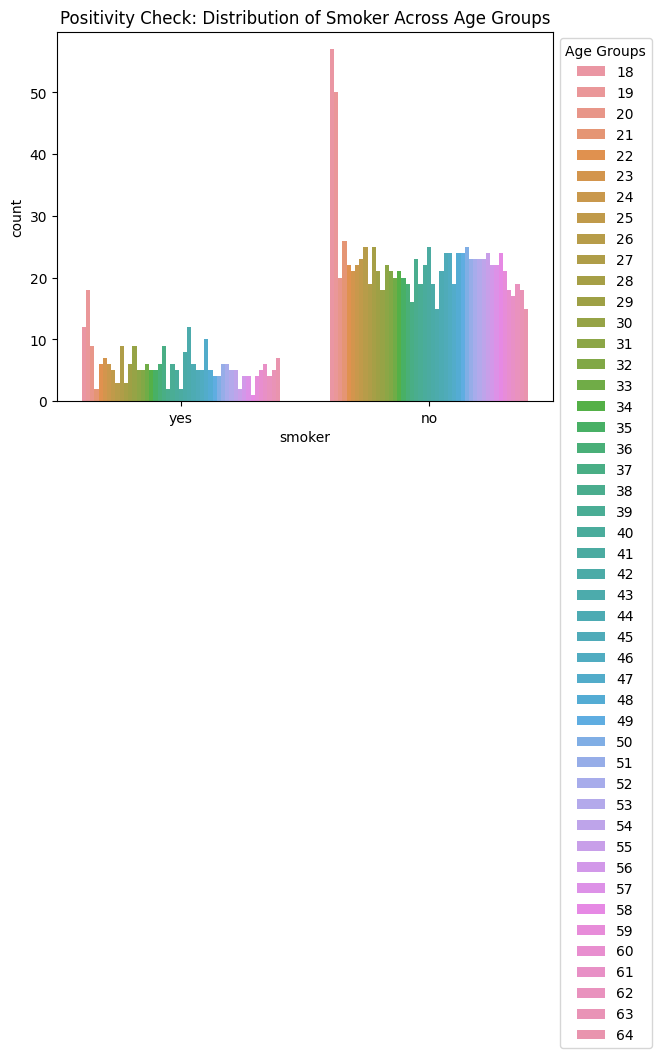

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Medical Cost Personal Datasets
data = pd.read_csv("/content/INFO_7390_Art_and_Science_of_Data/Causal_Inference/insurance.csv")

# Assuming 'smoker' is the binary treatment variable
# Visualize the distribution of 'smoker' across an important covariate (e.g., 'age')
sns.countplot(x='smoker', hue='age', data=data)

# Adjust the legend position
plt.legend(title='Age Groups', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Positivity Check: Distribution of Smoker Across Age Groups')
plt.show()



In this example, we are using a countplot to visualize the distribution of the binary treatment variable 'smoker' across different values of the covariate 'age'.
The idea is to ensure that there is some representation of both treatment levels (smoker and non-smoker) across different values of the covariate. If there are age groups where there are no smokers, it might indicate an issue with positivity. In this case, both groups exist in each age group, demonstrating positivity.

###Challenges and Considerations
Practical considerations for maintaining the positivity assumption are integral to the robustness and generalizability of causal inferences. Researchers should assess the common support, ensuring that there is overlap in the distribution of observed covariates between the treated and control groups. Visualization techniques, such as propensity score distribution plots, serve as valuable tools for evaluating and confirming the existence of common support.

Additionally, careful attention should be given to model specifications, particularly when employing propensity score models, to avoid extreme predictions or probabilities close to zero or one. Model diagnostics and sensitivity analyses can aid researchers in identifying and addressing issues related to the lack of overlap, ensuring that the positivity assumption is upheld. By actively addressing these practical considerations, researchers enhance the external validity of their findings, allowing for more reliable and applicable causal effect estimates across diverse subgroups within the population.

#Conclusion
In conclusion, this paper has undertaken a comprehensive exploration of causality assumptions and their pivotal role in the field of data science. Understanding and carefully considering these assumptions are fundamental for researchers seeking to draw meaningful and reliable conclusions about cause-and-effect relationships from observational data. The discussion has highlighted the inherent challenges in establishing causality. The limitations of experimental designs, such as randomized controlled trials, demonstrates the necessity of statistical methods and causal inference techniques in scenarios where controlled experiments are impractical or infeasible. The integration of hands-on examples aims to illustrate the complexities of causal inference, fostering a more nuanced and informed approach to drawing causal relationships from observational data.

# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://journals.lww.com/epidem/fulltext/2009/01000/the_consistency_statement_in_causal_inference__a.3.aspx#:~:text=Three%20assumptions%20sufficient%20to%20identify,measurement%20of%20the%20outcome%E2%80%9D).
5. https://www.youtube.com/watch?v=wFpUKGNgb0Y
6. https://clas.ucdenver.edu/marcelo-perraillon/sites/default/files/attached-files/w2_causal_inference_perraillon.pdf
7. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4912021/#:~:text=The%20consistency%20assumption%20implies%20that,be%20observed%20for%20that%20person.
8. https://medium.com/@EpiEllie/positivity-what-it-is-and-why-it-matters-for-data-science-d5e9c0bc1fcb#:~:text=So%2C%20in%20summary%2C%20positivity%20in,study%20or%20our%20target%20pop.

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently.

#License
Copyright (c) 2023 meghamkpatel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

